In [ ]:
#Categorical Variables and One Hot Encoding

In [5]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data1.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [8]:
dummies = pd.get_dummies(df.town)
merged = pd.concat([df,dummies],axis='columns')
final = merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
x = final.drop(['price'],axis='columns')
y = final.price

In [11]:
model.fit(x,y)

LinearRegression()

In [12]:
model.predict([[2800,0,1]])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [13]:
model.score(x,y)

0.9573929037221872

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
dfle = df
dfle.town = le.fit_transform(dfle.town)

In [17]:
X = dfle.drop(['price'],axis='columns').values
y = dfle.price

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("town",OneHotEncoder(),[0])],remainder = 'passthrough')
X = ct.fit_transform(X)

In [19]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [20]:
model.fit(X,y)

LinearRegression()

In [21]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [22]:
model.coef_

array([25686.4115244 , 40013.97548914,   126.89744141])

In [ ]:
#Logistic Regression

In [23]:
df = pd.read_csv("data.csv")
x = df[['age','mileage']]
y = df.price

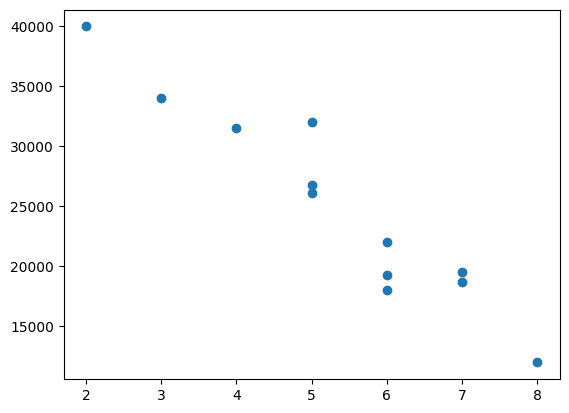

In [25]:
plt.scatter(df['age'],df['price'])

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
df = pd.read_csv("data2.csv")
df

,age,bought
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [33]:
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought,test_size=0.1)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
model.predict(x_test)

array([0, 1, 1])

In [37]:
model.score(x_test,y_test)

1.0

In [38]:
model.predict_proba(x_test)

array([[0.78566474, 0.21433526],
       [0.10454758, 0.89545242],
       [0.3481696 , 0.6518304 ]])

In [39]:
from sklearn.datasets import load_digits

In [40]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [40]:
#plt.gray()
#for i in range(5):
 #   plt.matshow(digits.images[i])

In [41]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [44]:
model.fit(x_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model.score(x_test,y_test)

0.9722222222222222

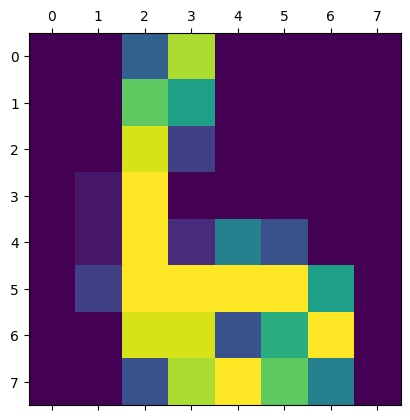

In [46]:
plt.matshow(digits.images[67])

In [47]:
digits.target[67]

np.int64(6)

In [48]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [49]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 43]])